<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>

## Instruction:

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?  
3. Does the report include a section with variations of Unsupervised Learning models and specifies which one is the model that best suits the main objective(s) of this analysis?
4. Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different modeling techniques?

## Import the required libraries

In [2]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass


import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


sns.set_context('notebook')
sns.set_style('white')

## Importing the Dataset

In [3]:
file_id = '1afBonE2qcOY5HJ23B27kAAWVxNlwWFIw'
train_url = f'https://drive.google.com/uc?id={file_id}'
data = pd.read_csv(train_url)
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


# 1. About the Data

**Data Source**

[Kaggle](https://www.kaggle.com/datasets/vetrirah/customer)

**Data Description**

**Context**

An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

**Content**

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

You are required to help the manager to predict the right group of the new customers.

**Data Dictionary**

| Column Name       | Description                                           | Values                        |
|-------------------|-------------------------------------------------------|-------------------------------|
| ID               | Customer's ID                                          | Unique Identifier             |
| Gender           | Customer's Gender                                      | Male / Female                 |
| Ever_Married     | Marital Status of the Customer                         | Yes / No                      |
| Age              | Customer's Age                                         | Numeric                       |
| Graduated        | If the Customer is Graduated or Not                    | Yes / No                      |
| Work_Experience  | Customer's Work Experience in Years                    | Numeric                       |
| Spending Score   | Spending Score of the Customer                         | Low / Average / High          |
| Var_1           | Anonymized Category for the Customer (Ignored)          | Cat_1 to Cat_6                |
| Segmentation     | Category of the Customer (Ignored)                     | Various Categories            |


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Note: There are missing values in some of the features

In [5]:
round(data.describe(include='all'), 2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
count,8068.00,8068,7928,8068.00,7990,7944,7239.00,8068,7733.00,7992,8068
unique,NaN,2,2,NaN,2,9,NaN,3,NaN,7,4
top,NaN,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN,Cat_6,D
freq,NaN,4417,4643,NaN,4968,2516,NaN,4878,NaN,5238,2268
mean,463479.21,NaN,NaN,43.47,NaN,NaN,2.64,NaN,2.85,NaN,NaN
std,2595.38,NaN,NaN,16.71,NaN,NaN,3.41,NaN,1.53,NaN,NaN
min,458982.00,NaN,NaN,18.00,NaN,NaN,0.00,NaN,1.00,NaN,NaN
25%,461240.75,NaN,NaN,30.00,NaN,NaN,0.00,NaN,2.00,NaN,NaN
50%,463472.50,NaN,NaN,40.00,NaN,NaN,1.00,NaN,3.00,NaN,NaN
75%,465744.25,NaN,NaN,53.00,NaN,NaN,4.00,NaN,4.00,NaN,NaN


Note: The data seems okay, there's no significant outlier.

In [6]:
# Dropping irrelevant features
data.drop(['ID', 'Var_1', 'Segmentation'], axis=1, inplace=True)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


# 2. Main Objectives

The main objective of this analysis is to perform customer segmentation using **clustering** techniques. By grouping customers with similar characteristics, we aim to identify distinct customer segments that can help businesses tailor their marketing strategies, improve customer engagement, and enhance overall customer experience.

Clustering will allow us to uncover hidden patterns in customer behavior, which can be beneficial for targeted promotions, personalized recommendations, and strategic decision-making. This analysis will provide valuable insights for stakeholders by **enabling them to optimize marketing efforts, improve customer retention, and allocate resources efficiently.**

# 3. ML Process

In [7]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [8]:
data.shape

(8068, 8)

## a. Data Cleaning

In [9]:
data_bin = data.copy()

Age_Bin = pd.cut(data['Age'], bins=[0, 18, 25, 35, 45, 90], labels=['0-18', '19-25', '26-35', '36-45', '46+'])
data_bin.insert(3, 'Age_Bin', Age_Bin)
data_bin.head()

,Gender,Ever_Married,Age,Age_Bin,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,19-25,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,36-45,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,46+,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,46+,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,36-45,Yes,Entertainment,NaN,High,6.0


In [10]:
# Missing value percentage
data_bin.isnull().sum() / len(data) * 100

,0
Gender,0.000000
Ever_Married,1.735250
Age,0.000000
Age_Bin,0.000000
Graduated,0.966782
Profession,1.536936
Work_Experience,10.275161
Spending_Score,0.000000
Family_Size,4.152206


In [11]:
data_clean = data_bin.copy()

In [12]:
# Relationship between age and ever_married features:
age_married = data_clean.groupby('Age_Bin')['Ever_Married'].value_counts().unstack()
age_married

Ever_Married,No,Yes
Age_Bin,,
0-18,125,4
19-25,771,69
26-35,1360,553
36-45,697,1205
46+,332,2812


Note: People aged between 0 and 35 are mostly unmarried, while those older than 35 are more likely to be married.

In [13]:
# Imputation on Ever_Married Features with the conclusion above:
data_clean.loc[data_clean['Ever_Married'].isnull() & data_clean['Age_Bin'].isin(['0-18', '19-25', '26-35']), 'Ever_Married'] = 'No'
data_clean.loc[data_clean['Ever_Married'].isnull() & ~data_clean['Age_Bin'].isin(['0-18', '19-25', '26-35']), 'Ever_Married'] = 'Yes'

data_clean.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Age_Bin,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335


In [14]:
# Relationship between Age_Bin and Graduated features:
graduated_age = data_clean.groupby(['Age_Bin'])['Graduated'].value_counts().unstack()
graduated_age

Graduated,No,Yes
Age_Bin,,
0-18,129,1
19-25,744,110
26-35,844,1086
36-45,449,1460
46+,856,2311


Note: People aged 0-25 mostly are not graduated. While people aged 36+ mostly are graduated.

In [15]:
# Relationship between Profession and Graduated features:
profession_graduated = data_clean.groupby(['Profession', 'Age_Bin'])['Graduated'].value_counts().unstack()
profession_graduated

Graduated               No   Yes
Profession    Age_Bin           
Artist        0-18       2     0
              19-25     11    27
              26-35     82   308
              36-45     77   757
              46+      121  1117
Doctor        0-18       9     0
              19-25     70    11
              26-35    130   134
              36-45     50   124
              46+       29   126
Engineer      0-18       0     0
              19-25     35     5
              26-35    116    76
              36-45    106   112
              46+      128   117
Entertainment 0-18       5     0
              19-25     33    17
              26-35    110   128
              36-45     75   205
              46+      122   242
Executive     0-18       2     0
              19-25     14     3
              26-35     46    20
              36-45     74    78
              46+      158   199
Healthcare    0-18     103     1
              19-25    499    35
              26-35    221   330
              36-45     10    84
              46+       11    26
Homemaker     0-18       0     0
              19-25     12     2
              26-35     64    46
              36-45     19    46
              46+       11    44
Lawyer        0-18       0     0
              19-25      2     1
              26-35      1     1
              36-45      0     4
              46+      227   375
Marketing     0-18       5     0
              19-25     54     7
              26-35     55    34
              36-45     31    33
              46+       28    40

Note: Artist aged 26+ are mostly graduated.

In [16]:
# Imputation based on conclusion above:
data_clean.loc[(data_clean['Graduated'].isnull()) & (data_clean['Age_Bin'].isin(['0-18', '19-25'])), 'Graduated'] = 'No'
data_clean.loc[(data_clean['Graduated'].isnull()) & (data_clean['Age_Bin'].isin(['36-45', '46+'])), 'Graduated'] = 'No'
data_clean.loc[(data_clean['Graduated'].isnull()) & (data_clean['Profession'] == 'Artist') & (data_clean['Age_Bin'] == '26-35'), 'Graduated'] = 'Yes'

data_clean.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Age_Bin,0
Graduated,14
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335


In [17]:
# Drop rows with null values in 'Graduated' column
data_clean = data_clean.dropna(subset=['Graduated'])

data_clean.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Age_Bin,0
Graduated,0
Profession,121
Work_Experience,829
Spending_Score,0
Family_Size,333


In [18]:
# Relationship between profession and spending_score
profession_spending = data_clean.groupby('Profession')['Spending_Score'].value_counts().unstack()
profession_spending

Spending_Score,Average,High,Low
Profession,,,
Artist,1011,242,1263
Doctor,177,30,478
Engineer,221,60,417
Entertainment,319,45,583
Executive,75,398,126
Healthcare,42,45,1243
Homemaker,59,26,160
Lawyer,18,324,281
Marketing,17,33,240


Note:
- People with average spending score are mostly artist and entertainment.
- People with high spending score are mostly executive and lawyer.
- People with low spending score are mostly artist and healthcare.

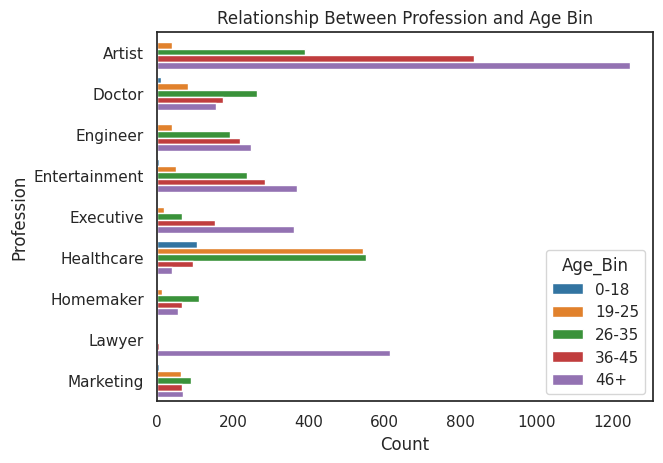

In [19]:
# Relationship etween profession and age_bin:

profession_age = data_clean.groupby(['Profession', 'Age_Bin']).size().unstack().reset_index()

profession_age_melted = profession_age.melt(id_vars='Profession', var_name='Age_Bin', value_name='Count')

sns.barplot(x='Count', y='Profession', hue='Age_Bin', data=profession_age_melted, orient='h')
plt.xlabel('Count')
plt.ylabel('Profession')
plt.title("Relationship Between Profession and Age Bin")
plt.show()


Note:
- People aged 0-35 are mostly working as healthcares.
- People aged 36-45 are mostly working as artists.
- People aged 46+ are mostly working as artists and lawyers.

In [20]:
# Imputation on Profession based on conclusion above:
data_clean.loc[(data_clean['Profession'].isnull()) &
               (data_clean['Age_Bin'].isin(['0-18', '19-25', '26-35'])) &
               (data_clean['Spending_Score'] == 'Low'),
               'Profession'] = 'Healthcare'

data_clean.loc[(data_clean['Profession'].isnull()) &
               (data_clean['Age_Bin'].isin(['36-45', '46+'])) &
               (data_clean['Spending_Score'].isin(['Low', 'Average'])),
               'Profession'] = 'Artist'

data_clean.loc[(data_clean['Profession'].isnull()) &
               (data_clean['Age_Bin'] == '46+') &
               (data_clean['Spending_Score'] == 'High'),
               'Profession'] = 'Lawyer'

# Conclusion from the analysis before
data_clean.loc[(data_clean['Profession'].isnull()) &
               (data_clean['Age_Bin'] == '26-35') &
               (data_clean['Graduated'] == 'Yes'),
               'Profession'] = 'Artist'

data_clean.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Age_Bin,0
Graduated,0
Profession,7
Work_Experience,829
Spending_Score,0
Family_Size,333


In [21]:
# Drop Drop rows with null values in 'Profession' column
data_clean = data_clean.dropna(subset=['Profession'])

data_clean.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Age_Bin,0
Graduated,0
Profession,0
Work_Experience,826
Spending_Score,0
Family_Size,332


In [22]:
# Imputation on Work_Experience feature with the median value of the work experience based on profession
data_clean['Work_Experience'] = data_clean.groupby('Profession')['Work_Experience'].transform(lambda x: x.fillna(x.median()))

data_clean.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Age_Bin,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,332


In [23]:
# Relationship between Age_Bin, Ever_Married and Family_Size:
age_married_famsize = data_clean.groupby(['Age_Bin', 'Ever_Married'])['Family_Size'].median().unstack()
age_married_famsize

Ever_Married,No,Yes
Age_Bin,,
0-18,4.0,3.0
19-25,4.0,2.0
26-35,3.0,2.0
36-45,1.0,3.0
46+,1.0,2.0


In [24]:
# Imputation on Family_Size using the median value of Family_Size based on Age_Bin and Ever_Married
data_clean['Family_Size'] = data_clean.groupby(['Age_Bin', 'Ever_Married'])['Family_Size'].transform(lambda x: x.fillna(x.median()))

# Check for remaining null values
data_clean.isnull().sum()

,0
Gender,0
Ever_Married,0
Age,0
Age_Bin,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0


In [25]:
round(data.describe(include='all'), 2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
count,8068,7928,8068.00,7990,7944,7239.00,8068,7733.00
unique,2,2,NaN,2,9,NaN,3,NaN
top,Male,Yes,NaN,Yes,Artist,NaN,Low,NaN
freq,4417,4643,NaN,4968,2516,NaN,4878,NaN
mean,NaN,NaN,43.47,NaN,NaN,2.64,NaN,2.85
std,NaN,NaN,16.71,NaN,NaN,3.41,NaN,1.53
min,NaN,NaN,18.00,NaN,NaN,0.00,NaN,1.00
25%,NaN,NaN,30.00,NaN,NaN,0.00,NaN,2.00
50%,NaN,NaN,40.00,NaN,NaN,1.00,NaN,3.00
75%,NaN,NaN,53.00,NaN,NaN,4.00,NaN,4.00


## b. EDA

In [26]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8047 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Gender           8047 non-null   object  
 1   Ever_Married     8047 non-null   object  
 2   Age              8047 non-null   int64   
 3   Age_Bin          8047 non-null   category
 4   Graduated        8047 non-null   object  
 5   Profession       8047 non-null   object  
 6   Work_Experience  8047 non-null   float64 
 7   Spending_Score   8047 non-null   object  
 8   Family_Size      8047 non-null   float64 
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 573.9+ KB


In [27]:
cat_features = data_clean.select_dtypes(include=['object', 'category']).columns
num_features = data_clean.select_dtypes(include=np.number).columns
cat_features, num_features

(Index(['Gender', 'Ever_Married', 'Age_Bin', 'Graduated', 'Profession',
        'Spending_Score'],
       dtype='object'),
 Index(['Age', 'Work_Experience', 'Family_Size'], dtype='object'))

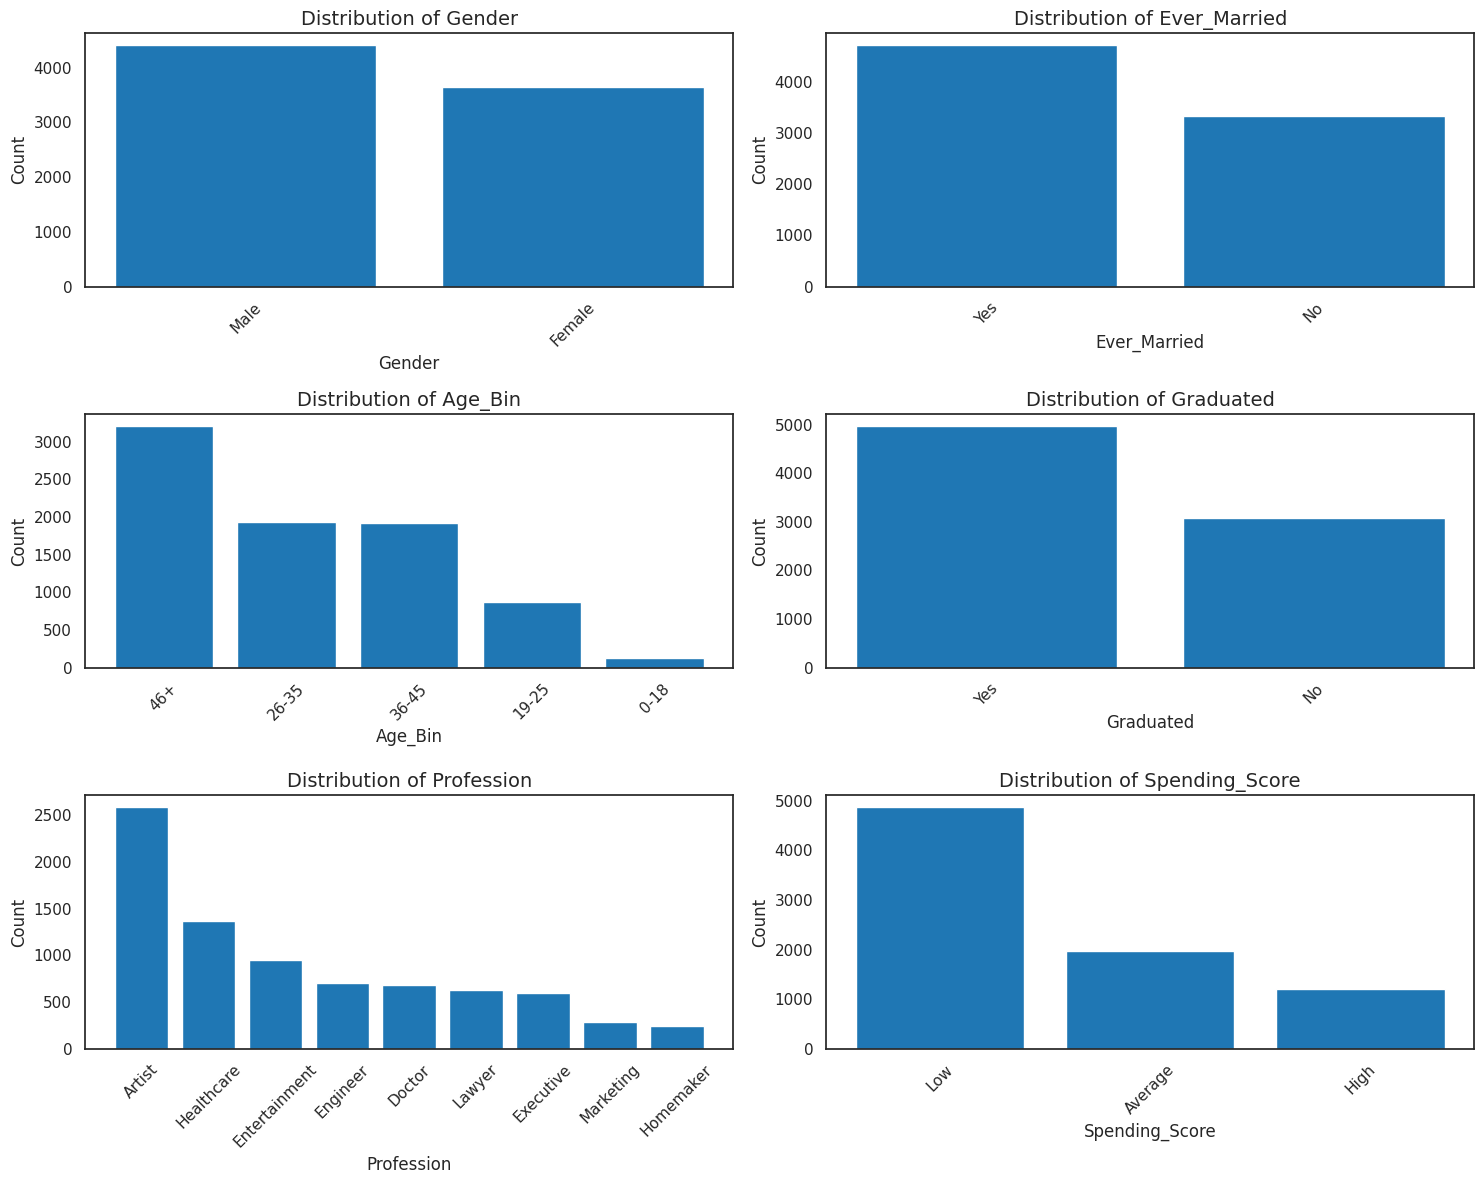

In [28]:
# Creating bar plot to display the distribution of the categorical features
plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_features):
    value_counts = data_clean[col].value_counts()

    plt.subplot(3, 2, i + 1)
    plt.bar(value_counts.index, value_counts.values)

    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Note: The distribution of the categorical features is not balanced, especially for Age_Bin, Spending_Score, and Profession

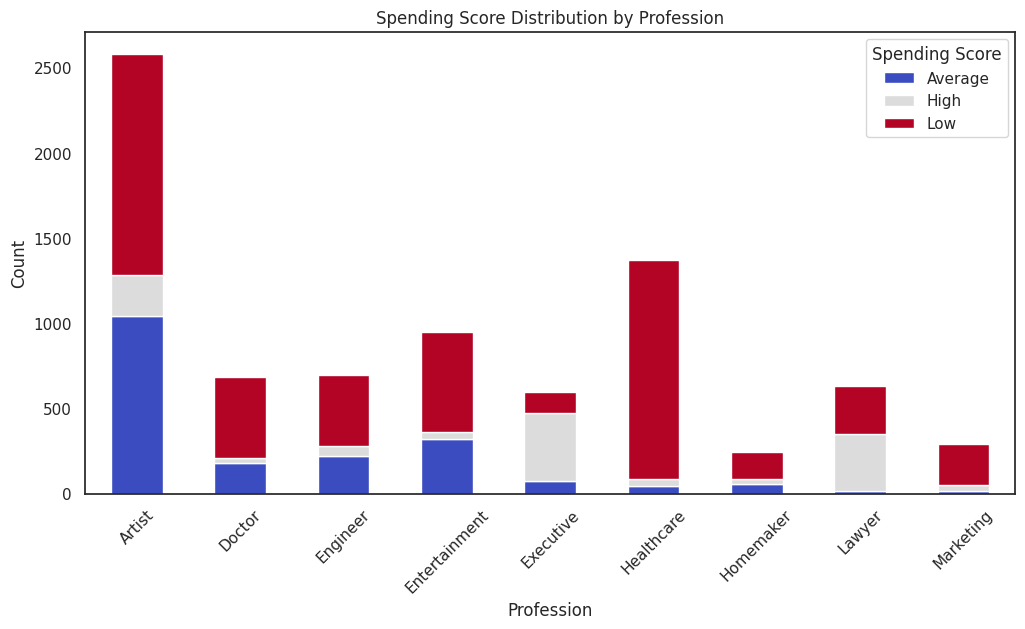

In [29]:
# Spending score by profession
profession_spending = data_clean.groupby('Profession')['Spending_Score'].value_counts().unstack()

profession_spending.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', stacked=True)
plt.title("Spending Score Distribution by Profession")
plt.xlabel("Profession")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.legend(title="Spending Score")
plt.show()

From the bar chart, we could infer that:
1. High Spending Scores are most prevalent among Executives and Lawyers , likely reflecting their higher disposable incomes.
2. Low Spending Scores are concentrated in Artists, Doctors, Engineers, Entertainment professionals, Healthcare workers, Marketing professionals, and Homemakers.
3. Average Spending Scores are most prominent among Artists and Entertainment.

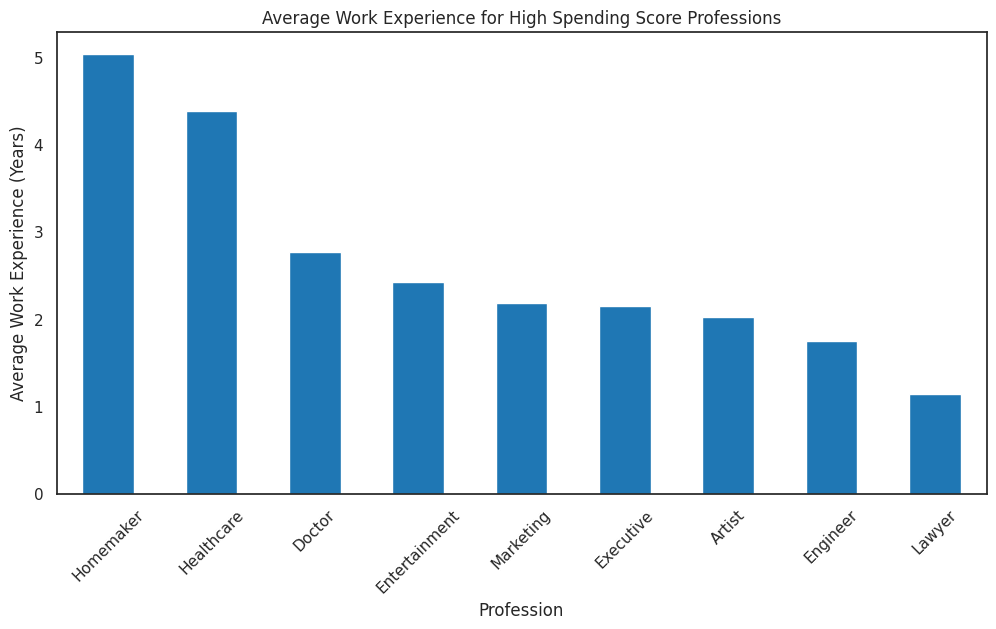

In [30]:
high_spend = data_clean[data_clean['Spending_Score'] == 'High']

high_work_exp = high_spend.groupby('Profession')['Work_Experience'].mean()

high_work_exp.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title("Average Work Experience for High Spending Score Professions")
plt.xlabel("Profession")
plt.ylabel("Average Work Experience (Years)")
plt.xticks(rotation=45)
plt.show()

We could see that that Homemakers have the highest average work experience (\~5 years) among the professions shown. However, this contradicts earlier findings where Homemakers exhibited low spending scores , suggesting work experience alone does not strongly predict spending behavior. Conversely, professions like Executives (\~2.1 years) and Lawyers (\~1.2 years) with significantly lower work experience —show high spending scores. This implies that income levels or career-specific earning potential, may outweigh work experience in influencing spending habits.

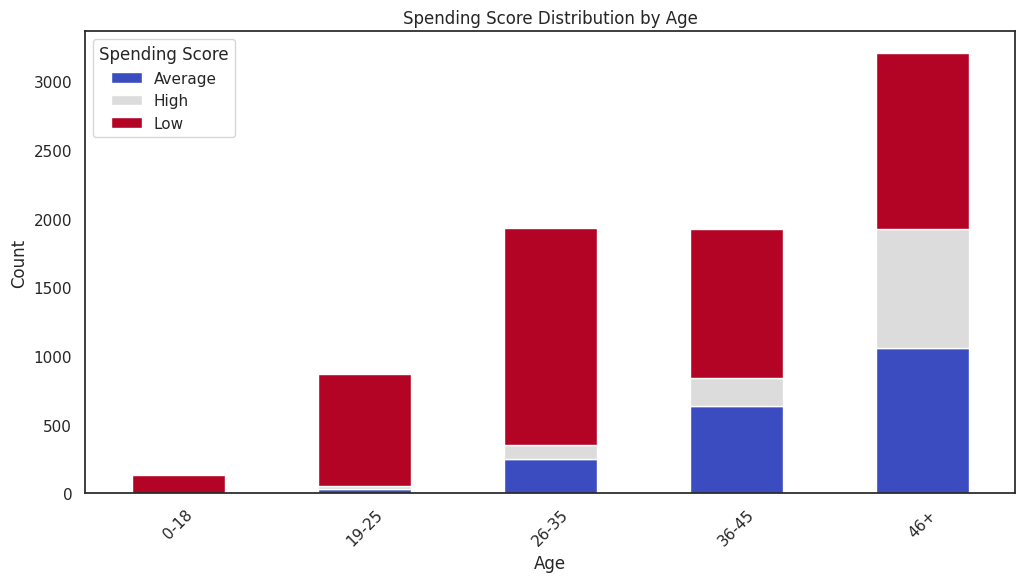

In [31]:
# Spending Score by Age
age_spending = data_clean.groupby('Age_Bin')['Spending_Score'].value_counts().unstack()

age_spending.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', stacked=True)
plt.title("Spending Score Distribution by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.legend(title="Spending Score")
plt.show()

From the bar chart, we could see distinct trends in spending behavior across age groups:
1. Younger Ages (0-18 and 19-25):
- Dominated by low spending scores, reflecting limited income (e.g., students, entry-level workers).
- Extremely little "High" or "Average" spending people, likely due to financial constraints or dependency on others.

2. Mid-Age Groups (26-35 and 36-45):
- A gradual shift toward average spending as individuals enter stable careers.
- The 36-45 age group shows a notable increase in high spending, suggesting greater disposable income or financial maturity.

3. Older Adults (46+):
- The largest proportion of average spending, indicating balanced financial habits.
- A significant subset of high spenders, possibly reflecting peak earning years or accumulated wealth.

We could infer that:
- Age correlates with spending capacity : Spending scores generally rise with age, peaking in mid-to-late adulthood.
- Low spending persists across ages : Even in older groups, a portion maintains low spending, hinting at factors like retirement, debt management, or conservative financial habits.

## c. Data Preprocessing

In [32]:
data_encoded = data_clean.copy().reset_index(drop=True)

data_encoded.drop(['Age_Bin'], axis=1, inplace=True) # We would use Age to preserve original information
data_encoded.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0


In [33]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder().fit(['Male', 'Female'])
data_encoded['Gender'] = le_gender.transform(data_encoded['Gender'])

le_married = LabelEncoder().fit(['Yes', 'No'])
data_encoded['Ever_Married'] = le_married.transform(data_encoded['Ever_Married'])

le_graduated = LabelEncoder().fit(['Yes', 'No'])
data_encoded['Graduated'] = le_graduated.transform(data_encoded['Graduated'])

data_encoded.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,1,0,22,0,Healthcare,1.0,Low,4.0
1,0,1,38,1,Engineer,1.0,Average,3.0
2,0,1,67,1,Engineer,1.0,Low,1.0
3,1,1,67,1,Lawyer,0.0,High,2.0
4,0,1,40,1,Entertainment,1.0,High,6.0


In [34]:
from sklearn.preprocessing import OneHotEncoder

oh_profession = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

profession_encoded = oh_profession.fit_transform(data_encoded[['Profession']])

profession_columns = oh_profession.get_feature_names_out(['Profession'])
profession_df = pd.DataFrame(profession_encoded, columns=profession_columns)

data_encoded = pd.concat([data_encoded.drop(columns='Profession'), profession_df], axis=1)

data_encoded.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,0,22,0,1.0,Low,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,38,1,1.0,Average,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,67,1,1.0,Low,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,67,1,0.0,High,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,40,1,1.0,High,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Display the null value
data_encoded[data_encoded.isnull().any(axis=1)]

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing


In [36]:
from sklearn.preprocessing import OrdinalEncoder

oe_spending_score = OrdinalEncoder(categories=[['Low', 'Average', 'High']])
data_encoded['Spending_Score'] = oe_spending_score.fit_transform(data_encoded[['Spending_Score']])

data_encoded.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,0,22,0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,38,1,1.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,67,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,67,1,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,1,40,1,1.0,2.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


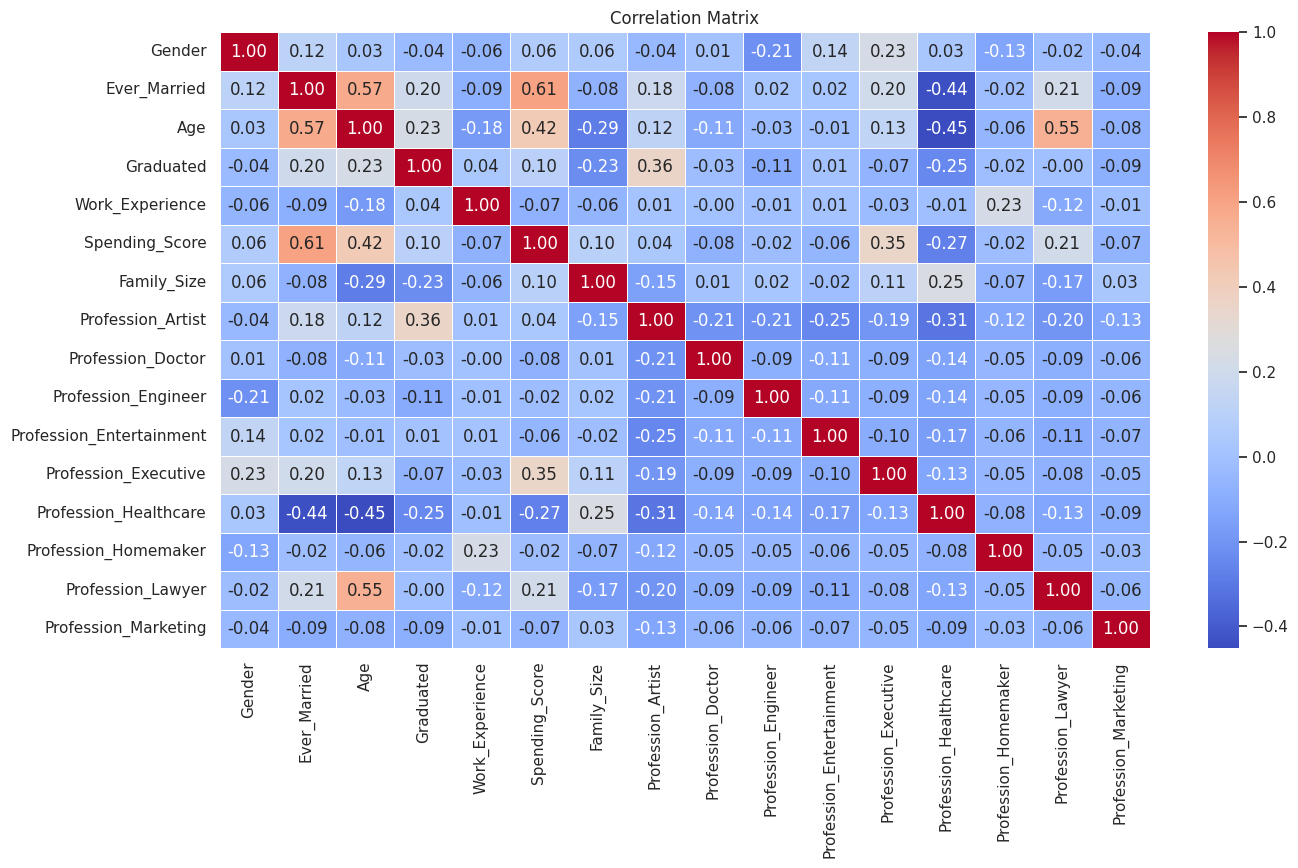

In [37]:
# Displaying the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(data_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

We could see that there are some correlated features, but we'll ignore them for now.

In [38]:
data_encoded.describe()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,0.547533,0.585684,43.503790,0.617373,2.498695,0.545296,2.830247,0.320989,0.085125,0.086740,0.117684,0.074438,0.170250,0.030446,0.078290,0.036038
std,0.497766,0.492634,16.716033,0.486059,3.281887,0.740776,1.512896,0.466886,0.279085,0.281472,0.322253,0.262498,0.375875,0.171822,0.268644,0.186397
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,41.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,53.000000,1.000000,4.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.000000,1.000000,14.000000,2.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# Standardization
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

In [40]:
df_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns)
df_scaled.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0.909051,-1.188956,-1.286497,-1.270240,-0.456685,-0.736160,0.773236,-0.687554,-0.305033,-0.308186,-0.365213,-0.283592,2.207651,-0.177207,-0.291445,-0.193354
1,-1.100049,0.841074,-0.329273,0.787253,-0.456685,0.613859,0.112211,-0.687554,-0.305033,3.244789,-0.365213,-0.283592,-0.452970,-0.177207,-0.291445,-0.193354
2,-1.100049,0.841074,1.405697,0.787253,-0.456685,-0.736160,-1.209839,-0.687554,-0.305033,3.244789,-0.365213,-0.283592,-0.452970,-0.177207,-0.291445,-0.193354
3,0.909051,0.841074,1.405697,0.787253,-0.761407,1.963877,-0.548814,-0.687554,-0.305033,-0.308186,-0.365213,-0.283592,-0.452970,-0.177207,3.431183,-0.193354
4,-1.100049,0.841074,-0.209620,0.787253,-0.456685,1.963877,2.095286,-0.687554,-0.305033,-0.308186,2.738131,-0.283592,-0.452970,-0.177207,-0.291445,-0.193354


In [41]:
# PCA to get a better Clustering:
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)  # Shows variance percentage for each component

Explained Variance Ratio:
[0.18097285 0.10902269 0.08885322 0.08093558 0.07821715 0.07097235
 0.069063   0.06553121 0.05350562 0.04773045 0.04436302 0.03978233
 0.03311915]


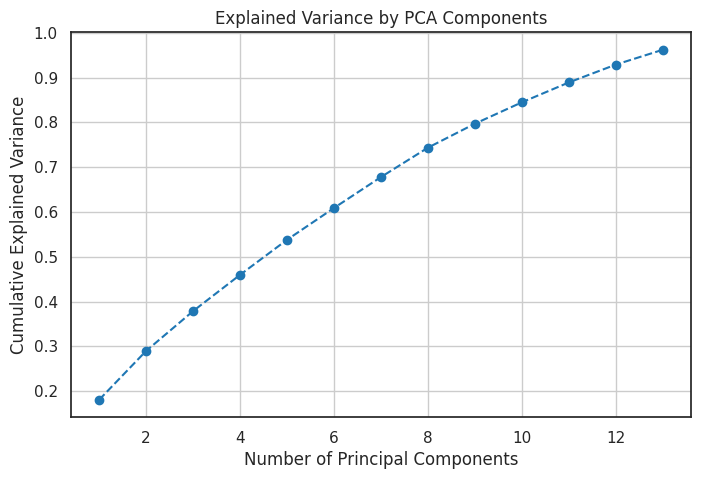

In [42]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

## d. Model Training

In [43]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km=[], num_clusters=0):
  color = 'brgcmyk'
  alpha = 0.5
  s = 20
  if num_clusters == 0:
    plt.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
  else:
    for i in range(num_clusters):
      plt.scatter(X[km.labels_ == i, 0], X[km.labels_ == i, 1], c=color[i], alpha=alpha, s=s)
      plt.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c=color[i], marker='x', s=100)

### 1) KMeans

In [132]:
inertia = []
silhouette_scores = []

k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df_pca, labels))

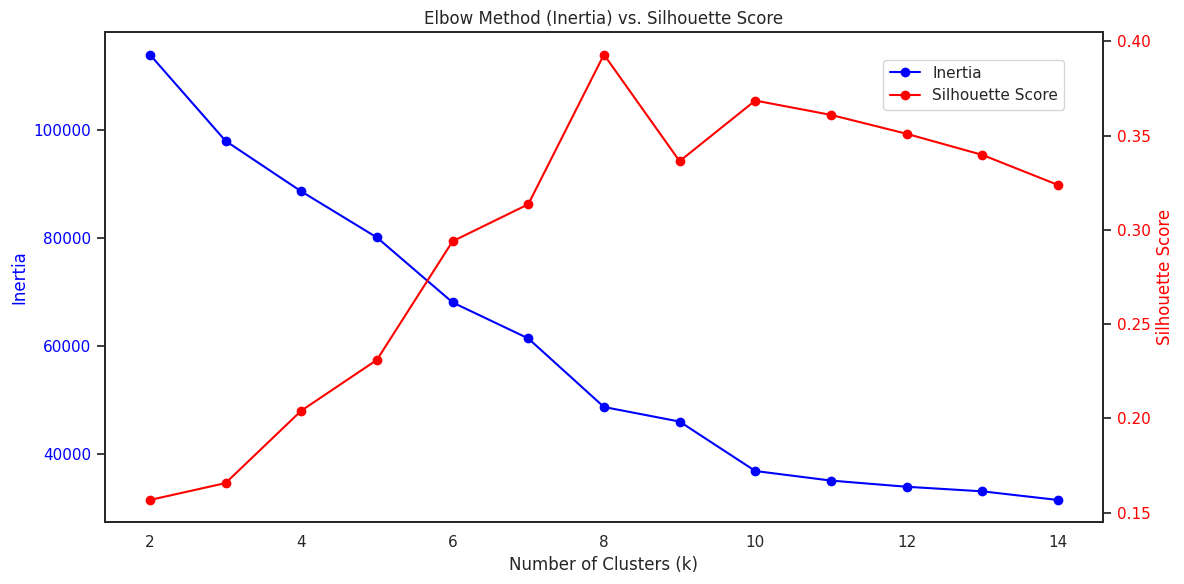

In [133]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Inertia (Elbow Method) - Blue
ax1.plot(k_values, inertia, 'b-o', label='Inertia')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Silhouette Scores - Red
ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores, 'r-o', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Elbow Method (Inertia) vs. Silhouette Score')
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))

plt.tight_layout()
plt.show()

In [147]:
kmeans = KMeans(n_clusters=8, random_state=42)
clusters = kmeans.fit_predict(df_pca)

In [148]:
df_predict = data_clean.copy().drop('Age_Bin', axis=1)
df_predict['clusters'] = list(clusters)
df_predict.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,clusters
0,Male,No,22,No,Healthcare,1.0,Low,4.0,3
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,7
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,7
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,1
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,0


In [149]:
df_predict['clusters'].value_counts()

,count
clusters,
2,2608
3,1636
0,947
7,698
4,685
1,629
5,599
6,245


In [150]:
# Evaluate the KMeans Result
sil_kmeans = silhouette_score(df_pca, clusters)
print("Silhouette Score:", sil_kmeans)

Silhouette Score: 0.39291438123164835


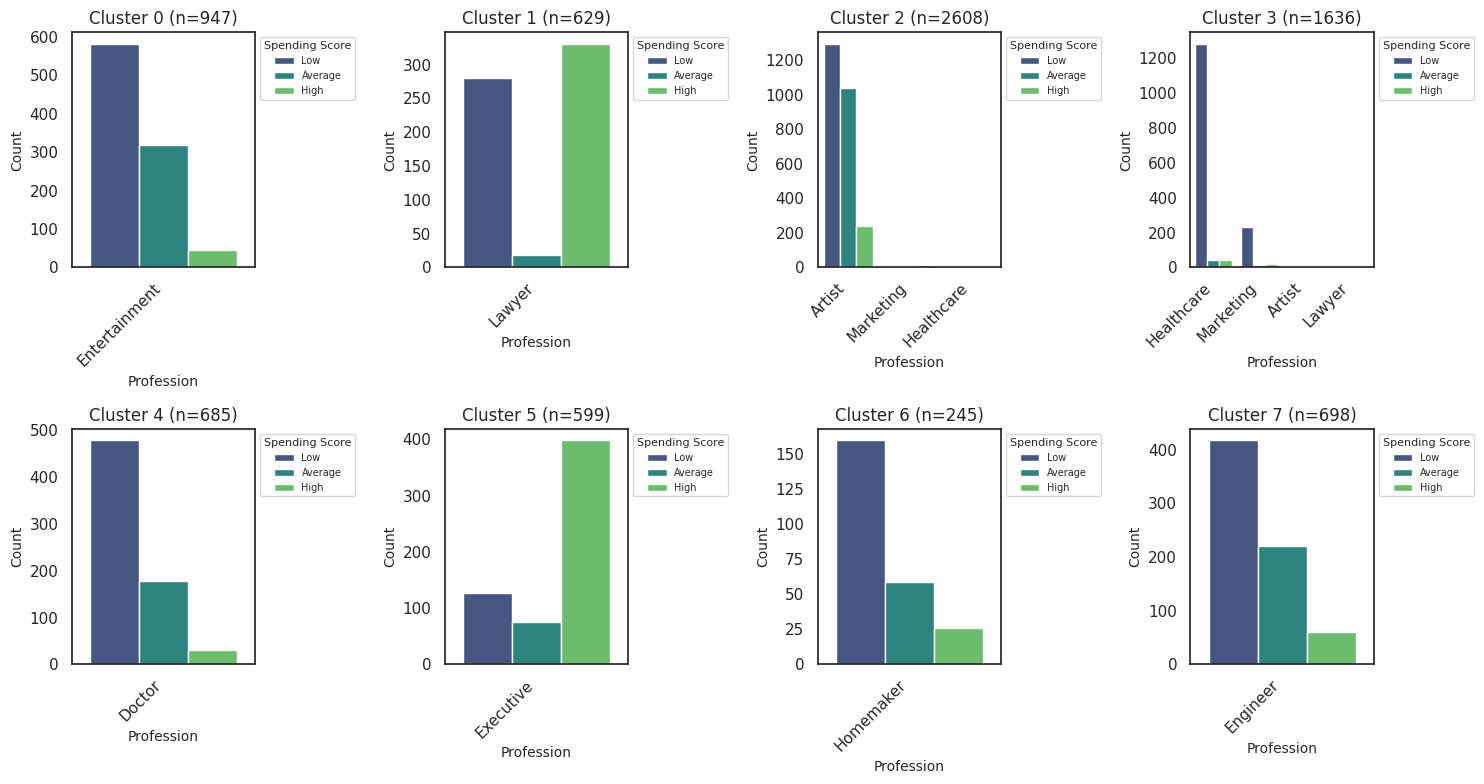

In [138]:
# Cluster Distribution based on Profession and Spending Score
spending_score_order = ['Low', 'Average', 'High']

plt.figure(figsize=(15, 8))

for i in range(8):
  plt.subplot(2, 4, i+1)

  cluster_data = df_predict[df_predict['clusters'] == i]

  if not cluster_data.empty:
    sns.countplot(
      data=cluster_data,
      x='Profession',
      hue='Spending_Score',
      order=cluster_data['Profession'].value_counts().index,
      hue_order=spending_score_order,
      palette='viridis'
    )
    plt.title(f"Cluster {i} (n={len(cluster_data)})", fontsize=12)
    plt.xlabel('Profession', fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title="Spending Score", title_fontsize=8, prop={'size': 7}, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    plt.title(f"Cluster {i} (Empty)", fontsize=12)

plt.tight_layout()
plt.show()

From the chart, we could infer that:

1. **Cluster 0 (Entertainment)**:
   - All individuals in this cluster work in "Entertainment."
   - The majority have a "Low" spending score, followed by an "Average" spending score.
   - Very few individuals have a "High" spending score.

2. **Cluster 1 (Lawyer)**:
   - All individuals in this cluster work as "Lawyers."
   - The majority have a "Low" spending score, with a significant number also having a "High" spending score.
   - Very few individuals have an "Average" spending score.

3. **Cluster 2 (Artist, Marketing, Healthcare)**:
   - This cluster includes mostly "Artists," along with some individuals in "Marketing" and "Healthcare", possibly due to outliers.
   - The majority have a "Low" spending score, followed by an "Average" spending score.
   - Very few individuals have a "High" spending score.

4. **Cluster 3 (Healthcare, Marketing, Artist, Lawyer)**:
   - This cluster consists primarily of individuals in "Healthcare" and "Marketing," with a small number in "Artist" and "Lawyer", possibly due to outliers.
   - The majority have a "Low" spending score.
   - Very few individuals have an "Average" or "High" spending score.

5. **Cluster 4 (Doctor)**:
   - All individuals in this cluster work as "Doctors."
   - The majority have a "Low" spending score, followed by an "Average" spending score.
   - Very few individuals have a "High" spending score.

6. **Cluster 5 (Executive)**:
   - All individuals in this cluster work as "Executives."
   - The majority have a "High" spending score, followed by an "Average" spending score.
   - Very few individuals have a "Low" spending score.

7. **Cluster 6 (Homemaker)**:
   - All individuals in this cluster are "Homemakers."
   - The majority have a "Low" spending score, followed by an "Average" spending score.
   - Very few individuals have a "High" spending score.

8. **Cluster 7 (Engineer)**:
   - All individuals in this cluster work as "Engineers."
   - The majority have a "Low" spending score, followed by an "Average" spending score.
   - Very few individuals have a "High" spending score.

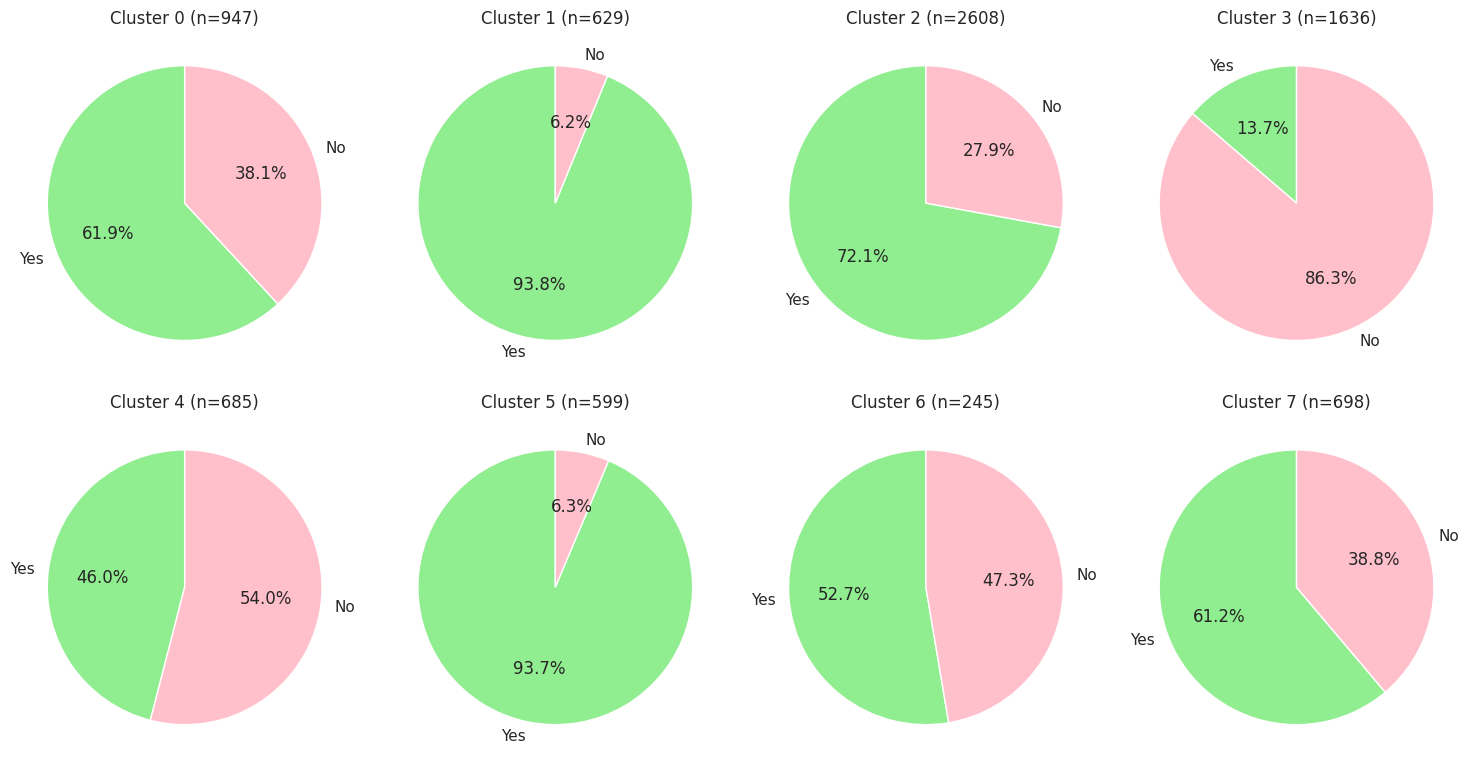

In [139]:
# Cluster Distribution based on Ever_Married
marital_status_order = ['Yes', 'No']

plt.figure(figsize=(15, 8))

for i in range(8):
  plt.subplot(2, 4, i+1)

  cluster_data = df_predict[df_predict['clusters'] == i]

  if not cluster_data.empty:
    counts = cluster_data['Ever_Married'].value_counts()
    counts = counts.reindex(marital_status_order, fill_value=0)

    plt.pie(
      counts,
      labels=marital_status_order,
      autopct='%1.1f%%',
      colors=['lightgreen', 'pink'],
      startangle=90
    )
    plt.title(f"Cluster {i} (n={len(cluster_data)})", fontsize=12)
  else:
    plt.title(f"Cluster {i} (Empty)", fontsize=12)

plt.tight_layout()
plt.show()

The pie charts provide insights into the distribution of marital status (`Ever_Married`) across each cluster. Below is a detailed breakdown for each cluster:

1. **Cluster 0 (n=947)**:
- **Married (`Yes`)**: 61.9%
- **Not Married (`No`)**: 38.1%
- **Insights**:
  - The majority of individuals in this cluster are married, indicating a higher prevalence of established relationships or family structures.
  - A significant proportion (38.1%) are not married, suggesting diversity in life stages or personal choices.

2. **Cluster 1 (n=629)**:
- **Married (`Yes`)**: 93.8%
- **Not Married (`No`)**: 6.2%
- **Insights**:
  - This cluster shows an overwhelming majority of married individuals, reflecting a strong correlation between this group's characteristics and marriage.
  - The small fraction of unmarried individuals may represent outliers or unique cases within the cluster.

3. **Cluster 2 (n=2608)**:
- **Married (`Yes`)**: 72.1%
- **Not Married (`No`)**: 27.9%
- **Insights**:
  - The majority of individuals in this cluster are married, but there is also a notable proportion of unmarried individuals.
  - This suggests a mix of life stages or varying priorities among members of this group.

4. **Cluster 3 (n=1636)**:
- **Married (`Yes`)**: 13.7%
- **Not Married (`No`)**: 86.3%
- **Insights**:
  - This cluster is dominated by individuals who are not married, with only a small fraction being married.
  - This could indicate that the group consists of younger individuals, those prioritizing careers over family, or those in professions less likely to involve marriage.

4. **Cluster 4 (n=685)**:
- **Married (`Yes`)**: 46.0%
- **Not Married (`No`)**: 54.0%
- **Insights**:
  - This cluster has a nearly equal split between married and unmarried individuals, with a slight majority being unmarried.
  - The balance suggests variability in life choices or stages within this group.

5. **Cluster 5 (n=599)**:
- **Married (`Yes`)**: 93.7%
- **Not Married (`No`)**: 6.3%
- **Insights**:
  - Similar to Cluster 1, this cluster shows a very high percentage of married individuals.
  - This indicates that marriage is a common or expected norm within this group, possibly due to shared values or lifestyles.

6. **Cluster 6 (n=245)**:
- **Married (`Yes`)**: 52.7%
- **Not Married (`No`)**: 47.3%
- **Insights**:
  - This cluster has a nearly equal distribution between married and unmarried individuals.
  - The near-even split suggests diversity in life stages or personal preferences within this group.

7. **Cluster 7 (n=698)**:
- **Married (`Yes`)**: 61.2%
- **Not Married (`No`)**: 38.8%
- **Insights**:
  - The majority of individuals in this cluster are married, though a significant portion remains unmarried.
  - This indicates a mix of relationship statuses, potentially reflecting diverse life priorities or circumstances.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

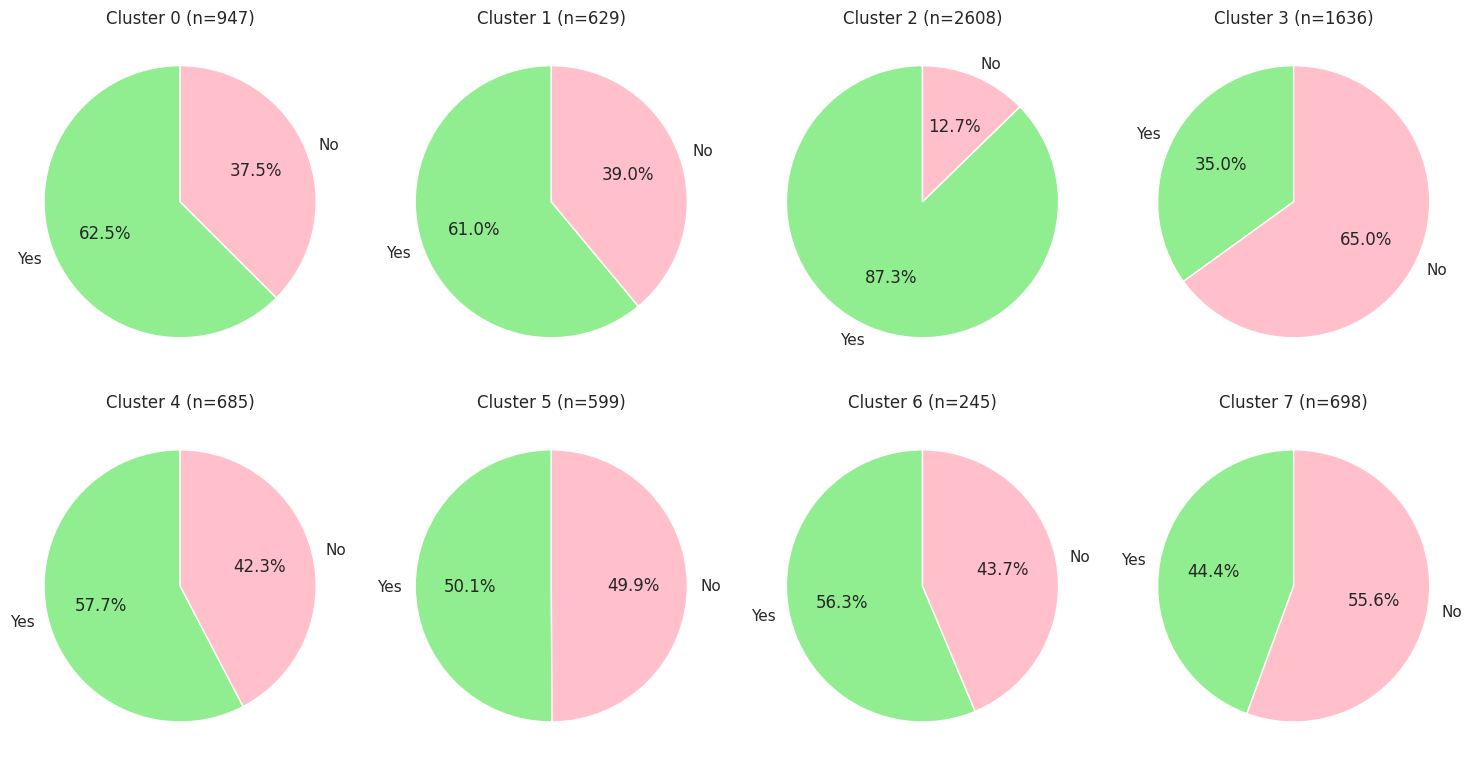

In [140]:
# Cluster Distribution based on Graduated
graduated_order = ['Yes', 'No']

plt.figure(figsize=(15, 8))

for i in range(8):
  plt.subplot(2, 4, i+1)

  cluster_data = df_predict[df_predict['clusters'] == i]

  if not cluster_data.empty:
    counts = cluster_data['Graduated'].value_counts()
    counts = counts.reindex(graduated_order, fill_value=0)

    plt.pie(
      counts,
      labels=graduated_order,
      autopct='%1.1f%%',
      colors=['lightgreen', 'pink'],
      startangle=90
    )
    plt.title(f"Cluster {i} (n={len(cluster_data)})", fontsize=12)
  else:
    plt.title(f"Cluster {i} (Empty)", fontsize=12)

plt.tight_layout()
plt

The following breakdown provides a detailed explanation of the graduation status distribution within each cluster:

1. **Cluster 0 (n=947)**:
- **Graduated (`Yes`)**: 62.5%
- **Not Graduated (`No`)**: 37.5%
- **Insights**:
  - This cluster has a relatively balanced distribution, with a slight majority of individuals having graduated.
  - The presence of both graduates and non-graduates suggests diversity in educational attainment, possibly reflecting roles that do not strictly require higher education.

2. **Cluster 1 (n=629)**:
- **Graduated (`Yes`)**: 93.8%
- **Not Graduated (`No`)**: 6.2%
- **Insights**:
  - This cluster is overwhelmingly composed of graduates, aligning with the high educational requirements for professions like law.
  - The near-universal graduation rate highlights the necessity of advanced degrees in this field.

3. **Cluster 2 (n=2608)**:
- **Graduated (`Yes`)**: 72.1%
- **Not Graduated (`No`)**: 27.9%
- **Insights**:
  - A significant majority of individuals in this cluster have graduated, indicating professions such as artists, marketers, or healthcare workers may often require formal education.
  - However, the presence of non-graduates suggests alternative pathways into these fields.

4. **Cluster 3 (n=1636)**:
- **Graduated (`Yes`)**: 13.3%
- **Not Graduated (`No`)**: 86.7%
- **Insights**:
  - This cluster stands out as having the highest proportion of non-graduates, suggesting it includes professions or roles that rely more on practical experience or vocational training than formal education.
  - Examples might include certain healthcare roles (e.g., technicians) or marketing positions that prioritize skills over degrees.

5. **Cluster 4 (n=685)**:
- **Graduated (`Yes`)**: 46.4%
- **Not Graduated (`No`)**: 53.6%
- **Insights**:
  - This cluster has a slight majority of non-graduates, which could reflect roles in healthcare or other fields where certifications or hands-on experience are valued over formal degrees.
  - The balance between graduates and non-graduates suggests variability in educational pathways within this group.

6. **Cluster 5 (n=599)**:
- **Graduated (`Yes`)**: 93.7%
- **Not Graduated (`No`)**: 6.3%
- **Insights**:
  - Similar to Cluster 1, this cluster is dominated by graduates, consistent with the high educational requirements for executive roles.
  - The strong emphasis on higher education underscores the importance of advanced degrees in leadership and management positions.

7. **Cluster 6 (n=245)**:
- **Graduated (`Yes`)**: 52.7%
- **Not Graduated (`No`)**: 47.3%
- **Insights**:
  - This cluster has a nearly equal split between graduates and non-graduates, suggesting that homemakers may come from diverse educational backgrounds.
  - The lack of a clear majority indicates that educational attainment does not significantly influence this role.

8. **Cluster 7 (n=698)**:
- **Graduated (`Yes`)**: 93.1%
- **Not Graduated (`No`)**: 6.9%
- **Insights**:
  - Like Clusters 1 and 5, this cluster is dominated by graduates, reflecting the technical and specialized nature of engineering professions.
  - The high graduation rate highlights the necessity of formal education in this field.

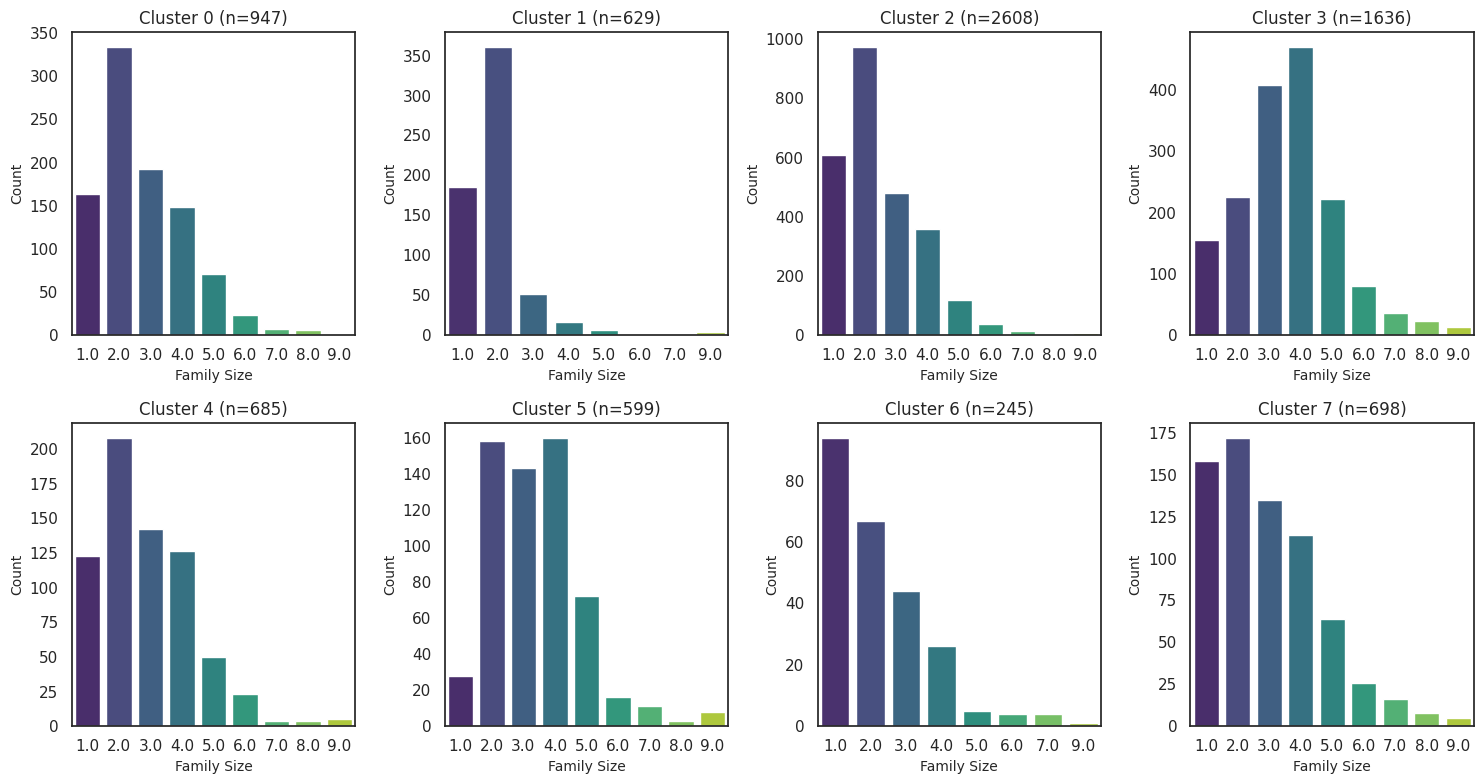

In [141]:
# Cluster Distribution based on Family Size
plt.figure(figsize=(15,8))

for i in range(8):
  plt.subplot(2, 4, i+1)

  cluster_data = df_predict[df_predict['clusters'] == i]

  if not cluster_data.empty:
    sns.countplot(
      data=cluster_data,
      x='Family_Size',
      palette='viridis'
    )
    plt.title(f"Cluster {i} (n={len(cluster_data)})", fontsize=12)
    plt.xlabel('Family Size', fontsize=10)
    plt.ylabel('Count', fontsize=10)
  else:
    plt.title(f"Cluster {i} (Empty)", fontsize=12)

plt.tight_layout()
plt.show()

**Cluster-by-Cluster Breakdown**

1. **Cluster 0 (n=947)**:
   - **Family Size Distribution**:
     - The most common family size is **2**, followed by **3**.
     - Smaller family sizes dominate, with very few families having more than **4** members.
   - **Insights**:
     - This cluster likely consists of individuals or couples without large families, possibly reflecting younger demographics or urban lifestyles.

2. **Cluster 1 (n=629)**:
   - **Family Size Distribution**:
     - The majority of individuals have a family size of **2**.
     - There are minimal occurrences of larger family sizes (e.g., **4** or more).
   - **Insights**:
     - The dominance of small families suggests this group may prioritize smaller households, potentially due to career demands or lifestyle choices.

3. **Cluster 2 (n=2608)**:
   - **Family Size Distribution**:
     - The most frequent family size is **2**, followed closely by **3**.
     - Larger family sizes (e.g., **4** or more) are less common but still present.
   - **Insights**:
     - This cluster shows a mix of small and medium-sized families, indicating diversity in household structures.

4. **Cluster 3 (n=1636)**:
   - **Family Size Distribution**:
     - The majority of individuals have a family size of **1**, indicating many single-person households.
     - Family sizes of **2** and **3** are less common, and larger families are rare.
   - **Insights**:
     - The prevalence of single-person households suggests independence or career-focused lifestyles, with fewer family commitments.

5. **Cluster 4 (n=685)**:
   - **Family Size Distribution**:
     - Family sizes are distributed relatively evenly between **2**, **3**, and **4**.
     - Larger families (e.g., **5** or more) are uncommon but present.
   - **Insights**:
     - This cluster represents a balanced mix of family sizes, suggesting variability in household compositions.

6. **Cluster 5 (n=599)**:
   - **Family Size Distribution**:
     - The most common family size is **3**, followed by **4**.
     - Larger families are more prevalent compared to other clusters.
   - **Insights**:
     - The presence of larger families indicates this group may include individuals with children or extended family living arrangements.

7. **Cluster 6 (n=245)**:
   - **Family Size Distribution**:
     - The majority of individuals have a family size of **2**, with some occurrences of **3**.
     - Larger families are rare.
   - **Insights**:
     - Similar to Clusters 0 and 1, this group is dominated by small families, potentially reflecting simplicity or minimalism in household structure.

8. **Cluster 7 (n=698)**:
   - **Family Size Distribution**:
     - The most frequent family size is **2**, followed by **3**.
     - Larger family sizes are less common but still present.
   - **Insights**:
     - This cluster mirrors the trends in Clusters 0 and 2, with a predominance of small to medium-sized families.

### 2) DBSCAN

In [124]:
dbscan = DBSCAN()

param_grid = {
    'eps': [3, 5, 10, 15],
    'min_samples': [5, 10, 30, 50]
}

scorer = make_scorer(silhouette_score)

grid_search = GridSearchCV(dbscan, param_grid, scoring=scorer, cv=5)
grid_search.fit(df_scaled)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'eps': 3, 'min_samples': 5}


In [153]:
dbscan_cv = DBSCAN(eps=3, min_samples=5)

clusters2 = dbscan_cv.fit_predict(df_pca)

print("Clusters:", set(clusters2))

Clusters: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)}


In [154]:
df_predict = data_clean.copy().drop('Age_Bin', axis=1)
df_predict['clusters'] = list(clusters2)
df_predict.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,clusters
0,Male,No,22,No,Healthcare,1.0,Low,4.0,0
1,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,2
4,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,3


In [155]:
df_predict["clusters"].value_counts().sort_index()

,count
clusters,
0,1370
1,698
2,630
3,947
4,2583
5,599
6,685
7,245
8,290


In [156]:
# Evaluate the DBSCAN Result
print("Silhouette Score:", silhouette_score(df_pca, clusters2))

Silhouette Score: 0.4254683273108849


### 3) Agglomerative Hierarchical Clustering

In [159]:
AC = AgglomerativeClustering(
    n_clusters=4,
    metric='euclidean',
    linkage='ward'
)

clusters3 = AC.fit_predict(df_pca)

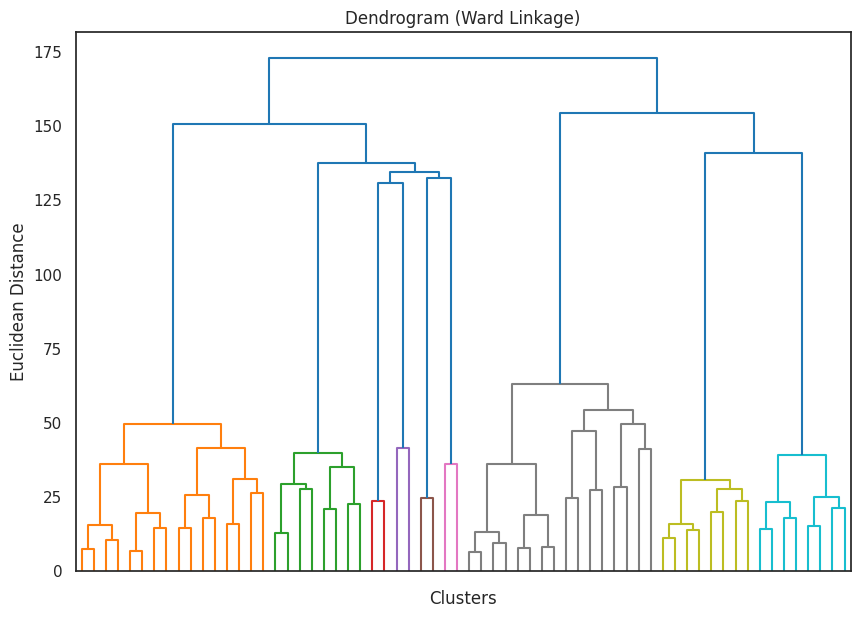

In [161]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))

linkage_matrix = shc.linkage(df_pca, method='ward')

shc.dendrogram(
    linkage_matrix,
    truncate_mode='level',
    p=5,
    show_leaf_counts=False,
)

plt.title("Dendrogram (Ward Linkage)")
plt.xlabel("Clusters")
plt.ylabel("Euclidean Distance")
plt.show()

In [162]:
# Evaluate the AHC result
print("Silhouette Score:", silhouette_score(df_pca, clusters3))

Silhouette Score: 0.2155783156874632


# 4. Model Comparison and Key Findings

## Summary of Unsupervised Model Training and Recommendations

#### **Model Variations Tested**
1. **Agglomerative Hierarchical Clustering (AHC)**  
   - **Silhouette Score**: 0.2156  
   - **Characteristics**:  
     - Bottom-up approach with Ward's linkage.  
     - Struggles with noise and scalability for large datasets.  

2. **DBSCAN (Density-Based Spatial Clustering)**  
   - **Silhouette Scores**: 0.4255 (optimized `eps=3`, `min_samples=5`).  
   - **Characteristics**:  
     - Robust to outliers and capable of identifying irregularly shaped clusters.  
     - Requires careful tuning of `eps` and `min_samples`.  

3. **K-Means Clustering**  
   - **Silhouette Score**: 0.3929  
   - **Characteristics**:  
     - Simple and fast for convex clusters but assumes spherical shapes.  
     - Requires prior knowledge of the number of clusters (`n_clusters`).  

---

#### **Recommended Final Model: DBSCAN**  
The **DBSCAN model with a silhouette score of 0.4255** is recommended as the final model:

1. **Superior Performance**:  
   - DBSCAN outperforms both AHC and K-Means in cluster separation (highest silhouette score), indicating well-defined segments.  

2. **Handling Real-World Data**:  
   - Naturally identifies outliers (e.g., customers with atypical spending habits) and adapts to varying cluster densities (e.g., high-income executives vs. budget-conscious homemakers).  

3. **Scalability**:  
   - Efficient for medium-to-large datasets (critical for processing 2,627 new customers).

## Key Findings:

#### **Key Insights from Clustering Analysis**
1. **Profession & Spending Behavior**:
   - **High Spenders**: Executives and Lawyers (high income, low work experience but high spending).
   - **Low Spenders**: Homemakers, Artists, Doctors, Engineers, Entertainment professionals.
   - **Mid-Spenders**: Artists (average spending) and mid-career professionals (36-45 years).

2. **Work Experience vs. Spending**:
   - **Mismatch**: Homemakers (high experience, low spending) vs. Executives/Lawyers (low experience, high spending).
   - **Key Driver**: Income and career stage outweigh tenure in predicting spending.

3. **Age Group Trends**:
   - **Younger (0-25)**: Low spenders (financial dependency).
   - **Mid-Age (26-45)**: Shift to average/high spending (career stability, peak earnings).
   - **Older (46+)**: Mix of average/high spenders (accumulated wealth).

4. **Family Dynamics**:
   - **Single Households**: Cluster 3 (low spenders, family size = 1).
   - **Larger Families**: Cluster 5 (family size ≥4, higher spending on practical needs).

5. **Persistent Low Spending**:
   - Exists across all demographics, suggesting systemic factors (debt, savings, risk aversion).

---

#### **Mapping Clusters to Existing Segments (A, B, C, D)**
Based on spending behavior, demographics, and lifestyle:
- **Segment A (High Spenders)**:
  - **Clusters**: 1 (Lawyers), 5 (Executives), 7 (Engineers with mid/high spending).
  - **Traits**: High income, peak earning years (36-45), small families.
  - **Products**: Premium models with luxury features.

- **Segment B (Mid-Spenders)**:
  - **Clusters**: 0 (Entertainment), 2 (Artists/Marketers), 4 (Doctors).
  - **Traits**: Career stability, average spending, family sizes 2-3.
  - **Products**: Family-friendly mid-range models.

- **Segment C (Low Spenders)**:
  - **Clusters**: 3 (Healthcare/Marketing), 6 (Homemakers).
  - **Traits**: Financial constraints, single households, younger/older ages.
  - **Products**: Budget models with financing options.

- **Segment D (Contextual Spenders)**:
  - **Clusters**: 4 (Doctors), 7 (Engineers), 5 (Executives with families).
  - **Traits**: Variable spending based on life stage (e.g., family size, retirement).
  - **Products**: Customizable options with targeted promotions.

---

#### **Strategic Recommendations for the Company**
1. **Tailored Marketing Campaigns**:
   - **Segment A**: Use premium branding and exclusive offers for Executives/Lawyers. Highlight status and innovation.
   - **Segment B**: Focus on reliability and value for mid-career professionals. Leverage digital ads and family-centric messaging.
   - **Segment C**: Offer flexible payment plans and discounts for budget models. Target younger audiences via social media.
   - **Segment D**: Personalize outreach based on family size and age (e.g., safety features for older adults, space for larger families).

2. **Product Positioning**:
   - Align products with segment needs:
     - **P1**: Budget-friendly for low spenders.
     - **P2/P3**: Family/utility vehicles for mid-spenders.
     - **P4/P5**: Luxury/performance models for high spenders.

3. **Address Persistent Low Spending**:
   - Investigate financial barriers (e.g., debt) and introduce loyalty programs or trade-in incentives.
   - Highlight cost-saving features (e.g., fuel efficiency) for conservative spenders.

4. **Leverage Demographic Data**:
   - Use age and family size to refine targeting.
   - For older adults (46+), emphasize comfort and safety.

5. **Predictive Modeling**:
   - Deploy the clustering model to classify the 2,627 new customers into Segments A-D.
   - Continuously update segments with real-time data.

---

#### **Conclusion**
By aligning customer segments with product offerings and addressing demographic-specific needs, the company can optimize market entry strategies. Focus on income, life stage, and family dynamics—rather than profession or age alone—to drive engagement and sales in the new market.

# 5. Next Steps

To refine the clustering results and improve the model's alignment with business goals, consider the following steps:


#### **1. Validate Clusters with Domain Knowledge**
- Collaborate with domain experts (e.g., sales/marketing teams) to verify if clusters align with real-world customer behavior.  

#### **2. Experiment with Feature Engineering**
- Add derived features (e.g., `age-group-spending interaction`).  
- Remove redundant features (e.g., highly correlated variables) to reduce noise.  

#### **3. Refine DBSCAN Hyperparameters**
- Expand the `eps` and `min_samples` grid (e.g., `eps=[1, 2, 3, 4]`, `min_samples=[3, 5, 7]`).  
 - Use **elbow analysis** or **k-distance graphs** to identify optimal `eps`.

#### **4. Test Alternative Clustering Algorithms**
- Evaluate **Gaussian Mixture Models (GMM)** for probabilistic clustering (captures cluster uncertainty).  

#### **5. Incorporate External Data**
- Integrate external datasets (e.g., regional economic indicators, competitor pricing).